## Emissions Data Collection

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/workspaces/carbonft/data/food_emissions.csv')

In [4]:
print(data.head())

  Domain Code            Domain  Area Code (M49)    Area  Element Code  \
0          GT  Emissions totals              124  Canada          7234   
1          GT  Emissions totals              124  Canada          7236   
2          GT  Emissions totals              124  Canada          7230   
3          GT  Emissions totals              124  Canada        724313   
4          GT  Emissions totals              124  Canada        723113   

                            Element  Item Code           Item  Year Code  \
0            Direct emissions (N2O)       5064  Crop Residues       2018   
1          Indirect emissions (N2O)       5064  Crop Residues       2018   
2                   Emissions (N2O)       5064  Crop Residues       2018   
3  Emissions (CO2eq) from N2O (AR5)       5064  Crop Residues       2018   
4           Emissions (CO2eq) (AR5)       5064  Crop Residues       2018   

   Year  Source Code      Source Unit      Value Flag Flag Description  Note  
0  2018         305

In [5]:
# Data filtering and cleaning

df_cleaned = data.dropna()

df_filtered = df_cleaned[(df_cleaned['Year'] == 2018) & (df_cleaned['Element'] == 'Direct emissions (N2O)')]

In [6]:
# Data aggregation
df_aggregated = df_filtered.groupby('Item').agg({'Value': 'sum'}).reset_index()

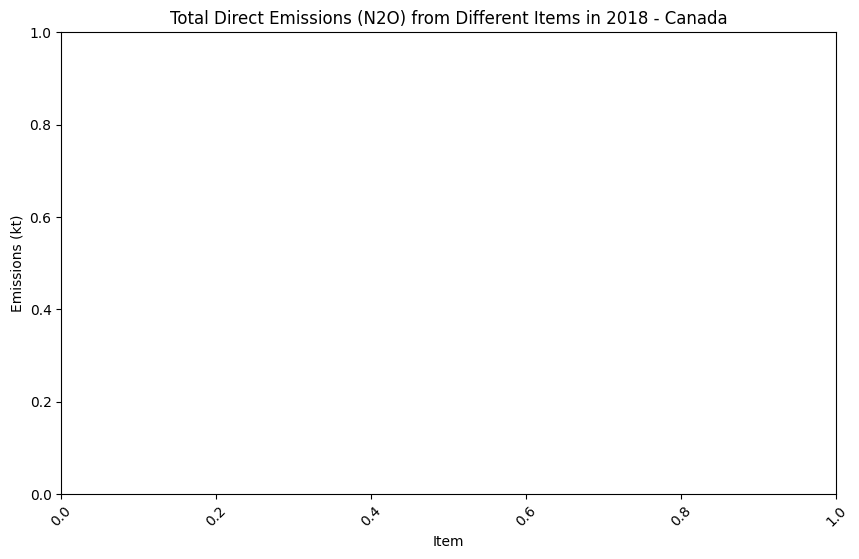

In [7]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Item', y='Value', data=df_aggregated)
plt.title('Total Direct Emissions (N2O) from Different Items in 2018 - Canada')
plt.xlabel('Item')
plt.ylabel('Emissions (kt)')
plt.xticks(rotation=45)
plt.show()


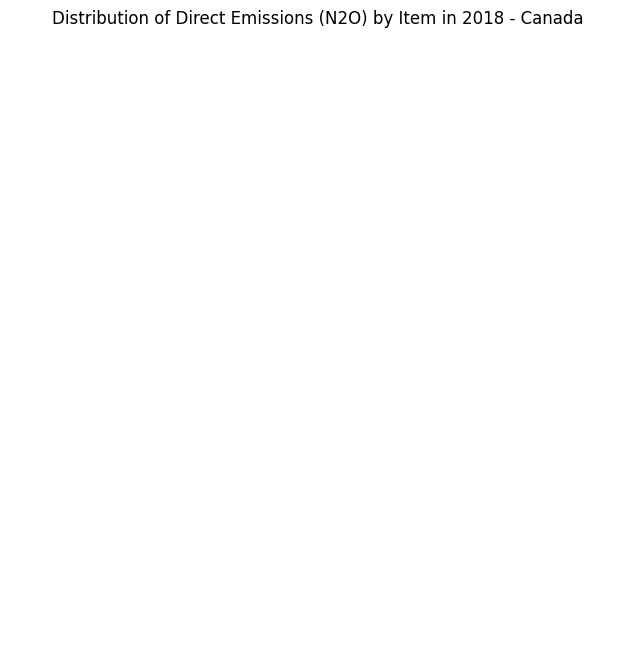

In [8]:
# Pie chart

plt.figure(figsize=(8, 8))
plt.pie(df_aggregated['Value'], labels=df_aggregated['Item'], autopct='%1.1f%%')
plt.title('Distribution of Direct Emissions (N2O) by Item in 2018 - Canada')
plt.show()